In [3]:
import torch
from torch.nn import Linear
import pandas as pd
import numpy as np
import torch.optim as optim

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# set random seed
torch.manual_seed(1)

Load the data from the entire csv file

In [4]:
D = torch.tensor(pd.read_csv('datasets/GasTurbine.csv').values, dtype=torch.float)

x_dataset = D[:,0:6].t()
y_dataset = D[:,6:7].t()

In [5]:
n = 6

Model definition

In [83]:
A = torch.randn((1,n), requires_grad=True)
b = torch.randn(1,requires_grad=True)

# Then we define the prediction model
def model(x_input):
    return A.mm(x_input) + b

# Loss function definition
def loss(y_predicted, x_predicted):
    return ((y_predicted-x_predicted)**2).sum()

# Training the model
optimizer = optim.Adam([A,b], lr=0.1)

for t in range(1000):
    optimizer.zero_grad()

    y_predicted = model(x_dataset)

    current_loss = loss(y_predicted, y_dataset)

    current_loss.backward()

    optimizer.step()
    # print(f"t = {t}, loss = {current_loss}, A = {A.detach().numpy()}, b = {b.item()}")

In [57]:
# print(x_dataset.t())
# print(y_predicted.t())
# y_predicted_check = y_predicted.data
# print(y_predicted_check)

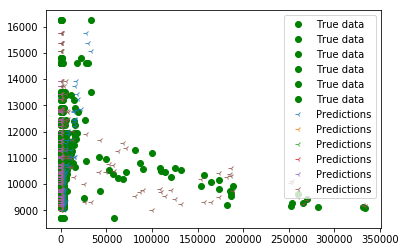

In [80]:
from matplotlib import pyplot as plt
plt.clf()
plt.plot(x_dataset.t(), y_dataset.t(), 'go', label='True data', alpha=1)
plt.plot(x_dataset.t(), y_predicted.data.t(), '3', label='Predictions', alpha=0.8)
plt.legend(loc='best')
plt.show()

In [84]:
y_mean = y_dataset.mean()
SSModel = ((y_predicted.t() - y_mean)**2).sum()
SSTotal = ((y_dataset.t() - y_mean)**2).sum()
r2 = SSModel.data/SSTotal.data
print(r2)

tensor(0.9804)
